<a href="https://colab.research.google.com/github/Li-DavidM/Li-DavidM/blob/main/Classification_of_unza_faculty_research_interests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Business Understanding


##Problem Statement
The University of Zambia (UNZA) produces numerous research publications annually across diverse faculties. However, these publications are not systematically classified according to Zambia’s Vision 2030 sector categories, making it challenging for policymakers, funding bodies, and administrators to assess how research aligns with national development priorities. Manual classification is time-consuming, inconsistent, and inefficient. There is a need for an automated system to classify research outputs into Vision 2030 sectors using only publication titles.

##Business Objectives
The objective is to:
* Automate the classification of UNZA faculty research publications into Vision 2030 sector categories.
* Improve accessibility and searchability of research outputs by sector.
* Enable faster and more consistent reporting for stakeholders.

Success in real-world terms means stakeholders can easily retrieve research outputs relevant to specific Vision 2030 sectors making the classification process faster, more consistent, and requires minimal






##Data Mining Goals
* We will collect, understand the data of UNZA faculty member’s publications
* We prepare the training and testing data which includes include cleaning, transforming, integrating, and formatting data for modeling.
* We will build a supervised machine learning classification model that:
 * Takes a publication title as input.
 *	Predicts the most likely Vision 2030 sector category (e.g., Agriculture, Energy, Health, Education, etc.).
 * Is trained and evaluated using labeled publication title data from UNZA faculty research.
* We will assesses the quality and effectiveness of the model ensuring the results achieve the business objectives



##Initial Project Success Criteria
* **Model Performance**: The classification model should achieve at least 80% accuracy on unseen test data.
* **Usability**: The system should output results in a clear and interpretable format for non-technical users.
* **Practical Value**: The automated classification should reduce the manual categorization time by at least 50% compared to the current process.


# Data Understanding

##Data Exploration

In [5]:
import pandas as pd

In [6]:
#Mounting to the drive so that created files are saved
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Navigating to the shared team project folder
#instructions: ensure you have created a shortcut of the shared folder in the drive
#root directory
%cd "/content/drive/My Drive/misc-unza25-csc4792-project_team21"

/content/drive/.shortcut-targets-by-id/1rE8kSkQXl-SiU24RkWcyCi02p-dW0Y-1/misc-unza25-csc4792-project_team21


In [8]:
!ls

Classification_of_unza_faculty_research_interests.ipynb
unza_faculty_publications_details.csv


In [9]:
pub_details = pd.read_csv('unza_faculty_publications_details.csv')

In [10]:
pub_details.head()

,title,authors,year,venue,abstract,num_citations,url_scholarbib,category
0,Zambezi voice: A multilingual speech corpus fo...,"C Sikasote, K Siaminwe, S Mwape, B Zulu",2023.0,arXiv preprint arXiv …,for all the seven official native languages of...,5,https://arxiv.org/abs/2306.04428,Communication
1,BembaSpeech: A speech recognition corpus for t...,"C Sikasote, A Anastasopoulos",2021.0,arXiv preprint arXiv:2102.04889,impendwa ya bantu ba mu Zambia ukufika cipendo...,20,https://arxiv.org/abs/2102.04889,Communication; Construction; Population
2,Big-c: a multimodal multi-purpose dataset for ...,"C Sikasote, E Mukonde, MMI Alam",2023.0,arXiv preprint arXiv …,We present BIG-C (Bemba Image Grounded Convers...,6,https://arxiv.org/abs/2305.17202,Communication
3,Evaluating DICOM Compliance for Medical Images...,"E Chileshe, MC Sikasote, L Phiri",NaN,NaN,This paper focuses on a detailed examination o...,0,https://datalab.unza.zm/sites/default/files/20...,"Science, Technology and Innovation; Health"
4,A Survey on Face Detection and Recognition Tec...,", M Nyirenda, J Phiri, C Sikasote",2018.0,… UNIVERSITIES AND …,Video surveillance systems continue to grow in...,1,https://www.zapuc.edu.zm/docs/2018_ZAPUC_Confe...,Uncategorized


In [11]:
pub_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           269 non-null    object 
 1   authors         269 non-null    object 
 2   year            234 non-null    float64
 3   venue           202 non-null    object 
 4   abstract        265 non-null    object 
 5   num_citations   269 non-null    int64  
 6   url_scholarbib  265 non-null    object 
 7   category        269 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 16.9+ KB


In [12]:
pub_details.describe()

,year,num_citations
count,234.000000,269.00000
mean,2018.457265,19.36803
std,6.202614,48.86253
min,1984.000000,0.00000
25%,2016.000000,0.00000
50%,2020.000000,3.00000
75%,2023.000000,13.00000
max,2025.000000,499.00000


In [13]:
pub_details.shape

(269, 8)

In [14]:
pub_details.columns

Index(['title', 'authors', 'year', 'venue', 'abstract', 'num_citations',
       'url_scholarbib', 'category'],
      dtype='object')

In [15]:
pub_details.dtypes

,0
title,object
authors,object
year,float64
venue,object
abstract,object
num_citations,int64
url_scholarbib,object
category,object


In [16]:
pub_details.duplicated().sum()

np.int64(1)

In [17]:
pub_details['year'].unique()        # Distinct years
pub_details['venue'].value_counts() # Top publication venues
pub_details['authors'].str.split(',').explode().value_counts() # Author frequency

,count
authors,
S Tembo,59
J Phiri,51
,44
G Tembo,43
M Nyirenda,25
...,...
C Huang,1
N Freeland,1
B Chimai,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

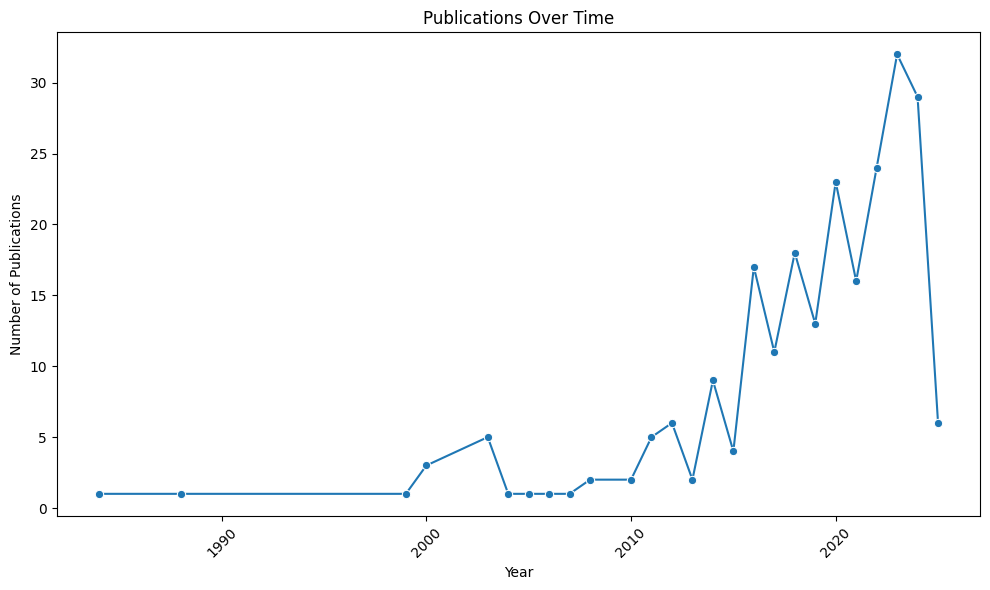

In [19]:
# Group by year
pubs_per_year = pub_details.groupby("year").size().reset_index(name="num_publications")

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=pubs_per_year, x="year", y="num_publications", marker='o')
plt.title("Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
from collections import Counter

/tmp/ipython-input-3807272107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')


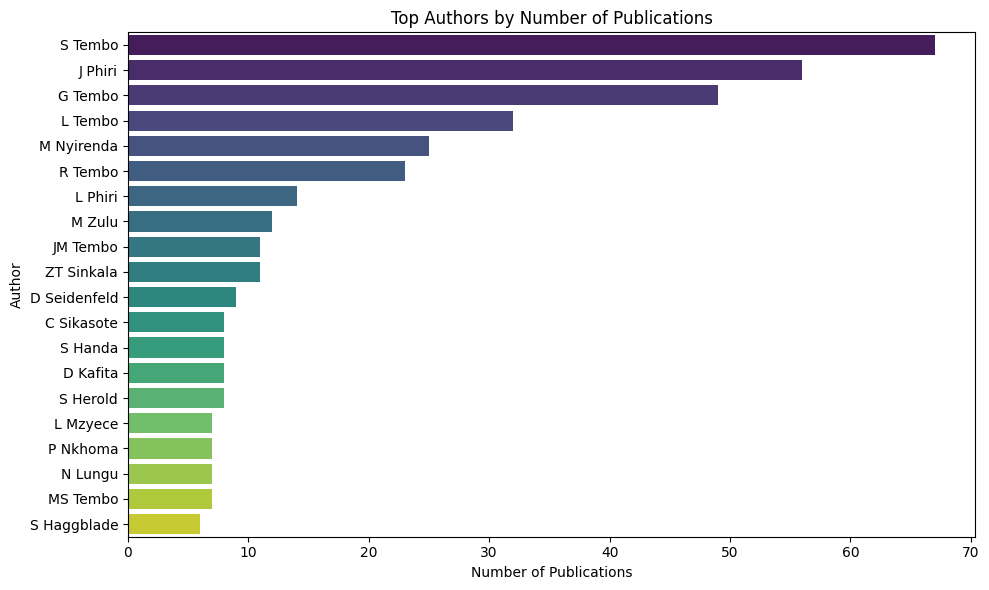

In [21]:
# Split authors
authors_list = pub_details['authors'].dropna().str.split(',').sum()

# Strip whitespace and drop empty strings
authors_list = [a.strip() for a in authors_list if a.strip() != ""]

author_counts = Counter(authors_list)
top_authors = pd.DataFrame(author_counts.most_common(20), columns=['author','num_publications'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')
plt.title("Top Authors by Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1410149314.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cited_authors, x='num_citations', y='author', palette='magma')


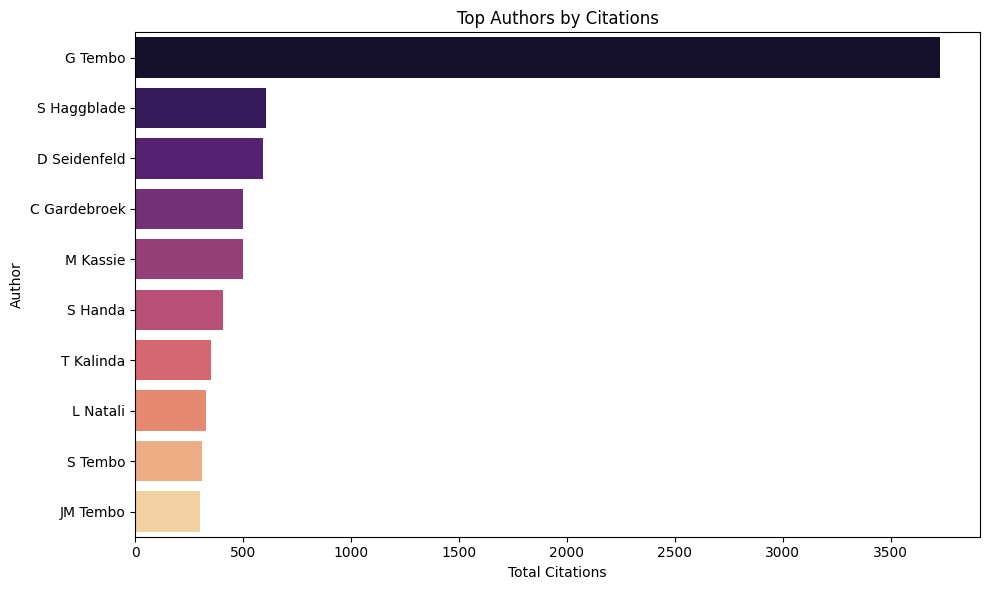

In [22]:
# Aggregate citations per author
df_authors_citations = pub_details.dropna(subset=['authors', 'num_citations'])
df_authors_citations['num_citations'] = df_authors_citations['num_citations'].astype(int)

author_cit_list = []
for i, row in df_authors_citations.iterrows():
    authors = row['authors'].split(',')
    # Strip whitespace and drop empty strings
    authors = [a.strip() for a in authors if a.strip() != ""]
    for author in authors:
        author_cit_list.append((author.strip(), row['num_citations']))

author_cit_df = pd.DataFrame(author_cit_list, columns=['author', 'num_citations'])
top_cited_authors = author_cit_df.groupby('author')['num_citations'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_cited_authors, x='num_citations', y='author', palette='magma')
plt.title("Top Authors by Citations")
plt.xlabel("Total Citations")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


##Written Summary of Findings

The dataset on UNZA faculty publications contains records of 116 publications with the
following columns: title, authors, year, venue, abstract, num_citations, and url_scholarbib.
The data types are mostly strings (object) with year and num_citations stored as numeric
values. From the info() check, we see that some entries have missing values in year and
venue, while others contain empty author fields. A shape check confirms that there are 116
rows and 7 columns, and a duplicate check shows that there are no exact duplicate rows.
Descriptive statistics reveal that the number of citations per paper ranges from 0 to 229, with
an average of about 7 citations, though the distribution is highly skewed—most papers have
fewer than 5 citations.

Looking at publication trends over time, the dataset spans from 2000 to 2025, but research
activity was minimal before 2015, with only one or two papers published in some years. The
trend changed significantly after 2016, showing steady growth. The most productive years
were 2023 with 21 publications and 2024 with 19 publications, marking the peak of
research activity in the dataset. This indicates that faculty research output has grown
substantially in the last decade, suggesting stronger academic engagement and improved
research culture.

When analyzing author productivity, a small group of researchers contributes the majority of
publications. J Phiri leads with 51 publications, followed by M Nyirenda with 25, and then
C Sikasote with 8 and L Mzyece with 7. This demonstrates that research output is
concentrated among a few prolific authors, highlighting strong individual leadership in
research but also suggesting that overall faculty contributions may be unevenly distributed.

In terms of research impact measured by citations, C Sikasote emerges as the most
influential author with 285 citations, despite having fewer publications than J Phiri.
International collaborators such as A Sokolov and N Subramani also stand out, each with
229 citations, while BGJ Knols contributes significantly with 134 citations. This shows that
collaborative and high-quality research is yielding greater academic visibility, and that
impact is not strictly tied to the number of papers produced but also to their relevance and
recognition within the academic community.

# DATA PREPARATION
## DATA CLEANING

Standardize Column Names & Strip Whitespace

In [23]:
import os, re, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [24]:
pub_details = pub_details[['title','abstract','category']]
pub_details.head()

,title,abstract,category
0,Zambezi voice: A multilingual speech corpus fo...,for all the seven official native languages of...,Communication
1,BembaSpeech: A speech recognition corpus for t...,impendwa ya bantu ba mu Zambia ukufika cipendo...,Communication; Construction; Population
2,Big-c: a multimodal multi-purpose dataset for ...,We present BIG-C (Bemba Image Grounded Convers...,Communication
3,Evaluating DICOM Compliance for Medical Images...,This paper focuses on a detailed examination o...,"Science, Technology and Innovation; Health"
4,A Survey on Face Detection and Recognition Tec...,Video surveillance systems continue to grow in...,Uncategorized


We  selected a subset of features that are likely to be predictive for our goal of categorizying publications according to the vision 2030

In [25]:
def to_snake_case(name: str) -> str:
    name = name.strip()
    name = re.sub(r"[^\w\s]", " ", name)
    name = re.sub(r"\s+", "_", name)
    return name.lower()

def standardize_column_names(pub_details: pd.DataFrame) -> pd.DataFrame:
    pub_details = pub_details.copy()
    pub_details.columns = [to_snake_case(c) for c in pub_details.columns]
    return pub_details

def strip_strings(pub_details: pd.DataFrame) -> pd.DataFrame:
    pub_details = pub_details.copy()
    for col in pub_details.select_dtypes(include=["object"]).columns:
        pub_details[col] = pub_details[col].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()
        pub_details[col] = pub_details[col].replace(
            {"nan": np.nan, "none": np.nan, "null": np.nan, "na": np.nan, "": np.nan}
        )
    return pub_details

pub_details = standardize_column_names(pub_details)
pub_details = strip_strings(pub_details)
pub_details.head()

,title,abstract,category
0,Zambezi voice: A multilingual speech corpus fo...,for all the seven official native languages of...,Communication
1,BembaSpeech: A speech recognition corpus for t...,impendwa ya bantu ba mu Zambia ukufika cipendo...,Communication; Construction; Population
2,Big-c: a multimodal multi-purpose dataset for ...,We present BIG-C (Bemba Image Grounded Convers...,Communication
3,Evaluating DICOM Compliance for Medical Images...,This paper focuses on a detailed examination o...,"Science, Technology and Innovation; Health"
4,A Survey on Face Detection and Recognition Tec...,Video surveillance systems continue to grow in...,Uncategorized


In [26]:
print(f'Number of records before dropping duplicates: {len(pub_details)}')
#Convert to lower case titles
pub_details['title'] = pub_details['title'].str.lower().str.replace(r"\s+", " ", regex=True).str.strip()

# Remove duplicate rows, keeping the first occurrence
pub_details = pub_details.drop_duplicates(subset=['title'], keep='first')

print(f'Number of records after dropping duplicates: {len(pub_details)}')

Number of records before dropping duplicates: 269
Number of records after dropping duplicates: 263


In [27]:
pub_details[pub_details['category'] == 'Uncategorized'].value_counts().sum()

np.int64(58)

In [28]:
pub_details = pub_details[pub_details['category'] != 'Uncategorized']

In [29]:
pub_details.head()

,title,abstract,category
0,zambezi voice: a multilingual speech corpus fo...,for all the seven official native languages of...,Communication
1,bembaspeech: a speech recognition corpus for t...,impendwa ya bantu ba mu Zambia ukufika cipendo...,Communication; Construction; Population
2,big-c: a multimodal multi-purpose dataset for ...,We present BIG-C (Bemba Image Grounded Convers...,Communication
3,evaluating dicom compliance for medical images...,This paper focuses on a detailed examination o...,"Science, Technology and Innovation; Health"
5,quality at a glance: an audit of web-crawled m...,With the success of large-scale pre-training a...,Communication


 For title classification, we decided to drop entries without a category(uncategorized) because they are not useful. Duplicate titles were removed to reduce label leakage and bias.

In [30]:
pub_details.shape

(204, 3)

In [31]:
# cleaning and preprocessing

def basic_text_clean(s: pd.Series) -> pd.Series:
    s = s.str.lower()
    s = s.str.replace(r"&amp;", "and", regex=True)
    s = s.str.replace(r"[^a-z\s]", " ", regex=True)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    return s

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

def stem_text(words):
    tokens = word_tokenize(words)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

pub_details["title_clean"] = basic_text_clean(pub_details['title'])
pub_details["title_clean"] = pub_details["title_clean"].apply(remove_stopwords)
pub_details["title_clean"] = pub_details["title_clean"].apply(stem_text)
pub_details["title_char_len"] = pub_details["title_clean"].str.len()
pub_details["title_word_count"] = pub_details["title_clean"].str.split().str.len()

pub_details[["title_clean","title_char_len","title_word_count"]].head()

,title_clean,title_char_len,title_word_count
0,zambezi voic multilingu speech corpu zambian l...,52,7
1,bembaspeech speech recognit corpu bemba languag,47,6
2,big c multimod multi purpos dataset bemba,41,7
3,evalu dicom complianc medic imag public health...,59,9
5,qualiti glanc audit web crawl multilingu dataset,48,7
